In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df=pd.read_csv("Loan payments data.csv")
df.head(5)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [3]:
df.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


Dataset Details

In [4]:
#Loan_id : A unique loan (ID) assigned to each loan customers- system generated
#Loan_status : Tell us if a loan is paid off, in collection process - customer is yet to payoff, or paid off after the collection efforts
#Principal : Pincipal loan amount at the case origination OR Amount of Loan Applied
#terms : Schedule
#Effective_date : When the loan got originated (started)
#Due_date : Due date by which loan should be paid off
#Paidoff_time : Actual time when loan was paid off , null means yet to be paid
#Pastdue_days : How many days a loan has past due date
#Age : Age of customer
#Education : Education level of customer applied for loan
#Gender : Customer Gender (Male/Female)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [6]:
df.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [7]:
df.shape

(500, 11)

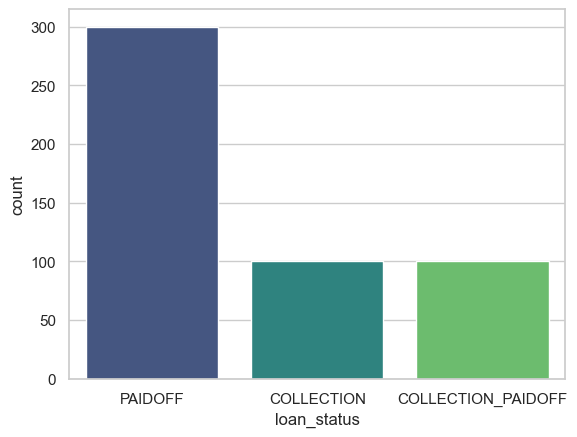

In [25]:
#set background of charts as white 
x = sns.countplot(x="loan_status", data=df, hue="loan_status", palette="viridis", legend=False)
plt.show()

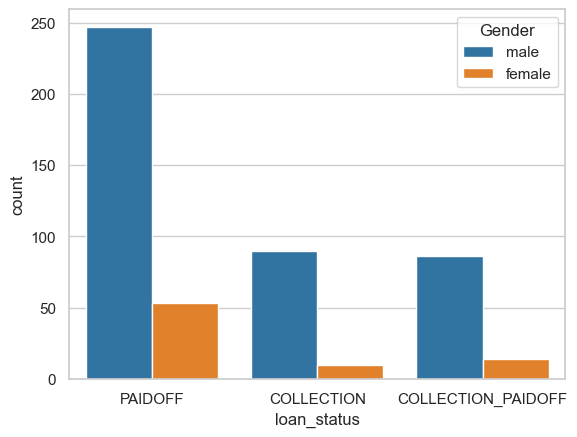

In [9]:
#Let's see loan status based on Gender.
color_list = ["#1f77b4", "#ff7f0e"]
y = sns.countplot(x="loan_status", data=df, hue="Gender", palette=color_list)

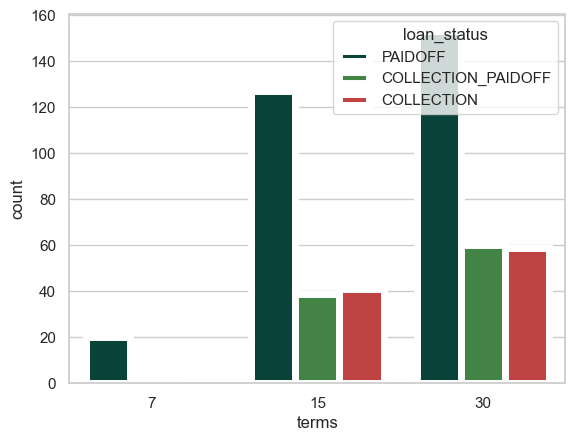

In [10]:
#Let's see how many people loan applications have been applied for weekly (7 days), Fortnightly (15 Days) , Monthly (30days) payment mode and whats the loan status , how well are weekly, fortnightly and monthly loans are in terms of paid status.
dark_palette = {
    "PAIDOFF": "#004d40",  # Dark Teal
    "COLLECTION": "#d32f2f",  # Dark Red
    "COLLECTION_PAIDOFF": "#388e3c"  # Dark Green
}
x = sns.countplot(x="terms", data=df, hue="loan_status", palette=dark_palette, linewidth=5)

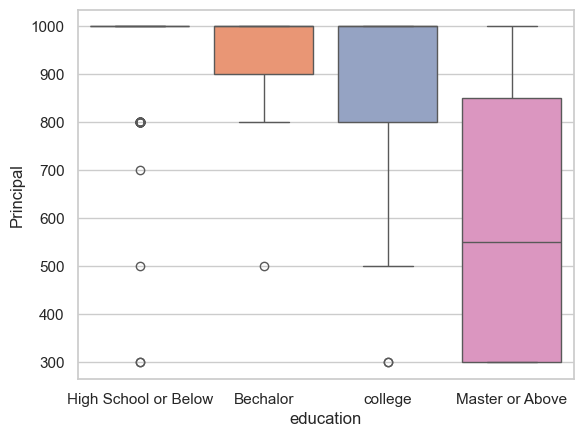

In [24]:
# let's see how education affects the loan amount and payment status.
sns.boxplot(x='education', y='Principal', hue='education', data=df, palette='Set2', dodge=False)
plt.legend([], [], frameon=False)  # This will remove the redundant legend
plt.show()




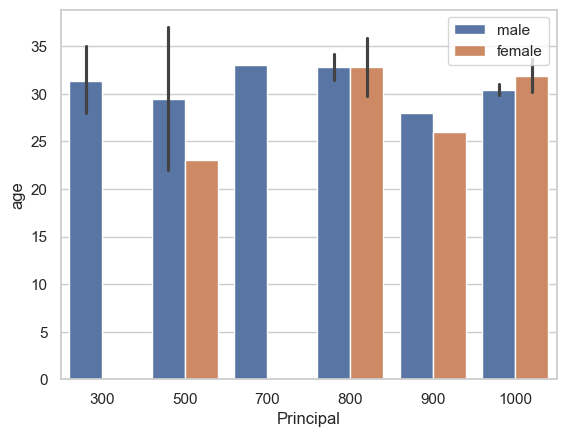

In [12]:
#Age vs Principal amount based on Gender.
ax = sns.barplot(x="Principal", y="age",hue="Gender" ,  data=df)
ax.legend(loc="upper right")

<Figure size 2500x500 with 0 Axes>

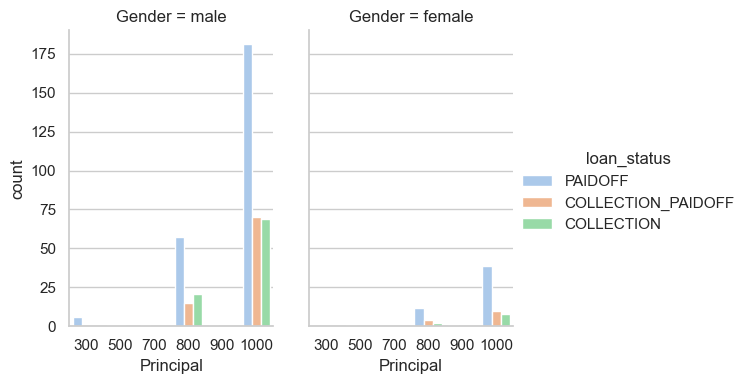

In [13]:
# Male candidates do have more Loan applications compared to Female candidates and most of the canidates who apply for the loan are in higher side of Principal Amount means they wish to go for Better studies.
fig = plt.figure(figsize=(25,5))
g = sns.catplot(x="Principal", hue="loan_status", col="Gender",palette='pastel',
                data=df, kind="count",
                 height=4, aspect=.7);

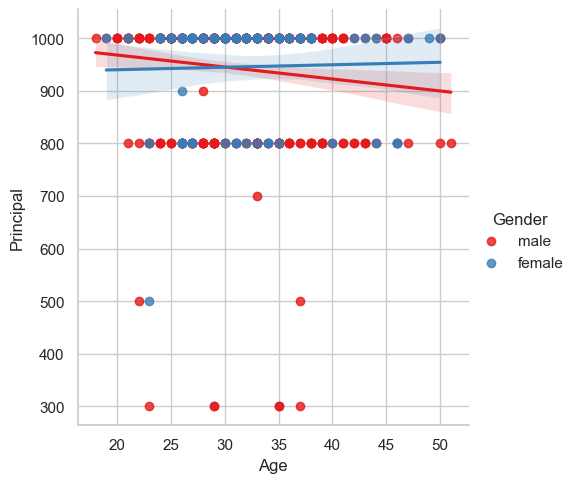

In [14]:
g = sns.lmplot(x="age", y="Principal", hue="Gender",
               truncate=True, height=5, data=df, palette="Set1")
g.set_axis_labels("Age", "Principal")


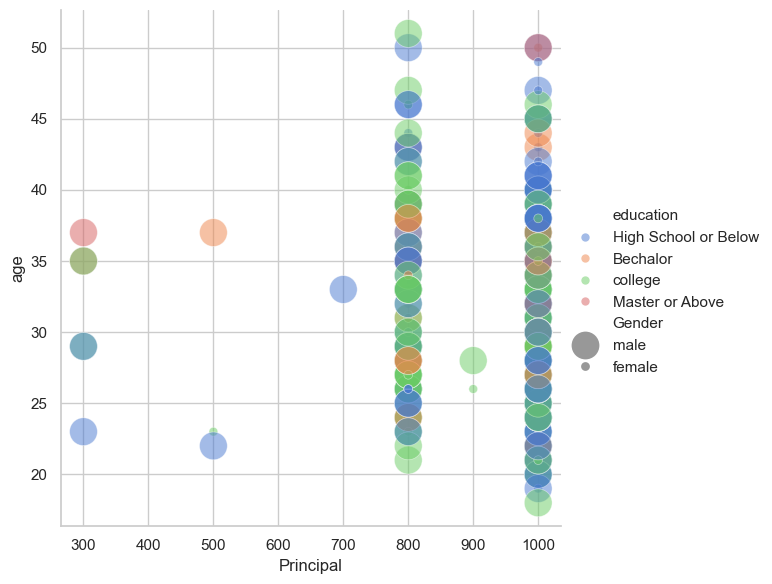

In [15]:
#most of the loan applicants do apply for loan amount as 800 , 1000 ( Seems like most of the people applicants go for higher/better studies for a bright future.
sns.relplot(x="Principal", y="age", hue="education",size="Gender",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

In [16]:
df['past_due_days'].isnull().sum()

300

In [17]:
defaultPerc=((df.shape[0]-df['past_due_days'].isnull().sum())/df.shape[0])*100
print(defaultPerc,"% of people paid after time")

40.0 % of people paid after time


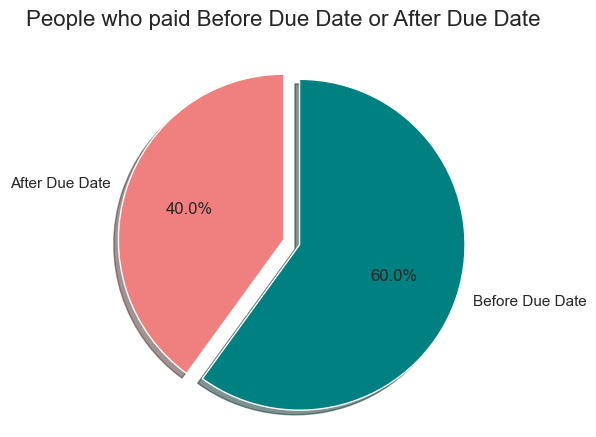

In [18]:
# we can see that 40% people paid loan after due date which is not a good figure we need to work on our loan collection process and streamlining the loan guidelines so that people pay before time rather than being defaulter.
import matplotlib.pyplot as plt

# Your data
labels = ['After Due Date', 'Before Due Date']
sizes = [defaultPerc, 100 - defaultPerc]
explode = (0, 0.1)  # only "explode" the 2nd slice 

# Define your custom colors
colors = ['lightcoral', 'teal']

# Create the pie chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')

# Title
fig1.suptitle('People who paid Before Due Date or After Due Date', fontsize=16)

# Show the plot
plt.show()


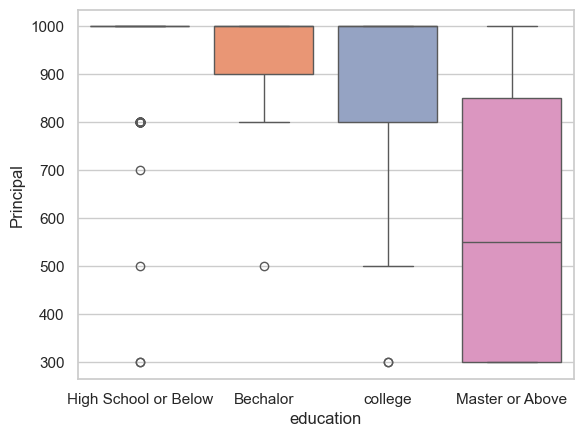

In [23]:
# we can clearly see that people going for better education ( College , Masters ) apply for high Principal amount of loan , which is true , better/Higher educations are costly and come with price.
sns.boxplot(x='education', y='Principal', hue='education', data=df, palette='Set2', legend=False)
plt.show()


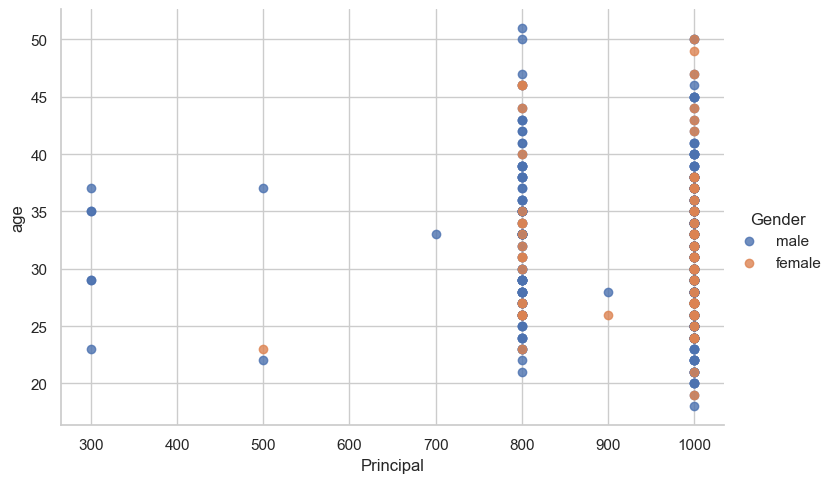

In [20]:
#both male and female applicants who are going for higher education apply for Principal amount of 800 or 1000.
sns.lmplot(x='Principal', y='age', hue = 'Gender', data=df, aspect=1.5, fit_reg = False)

plt.show()

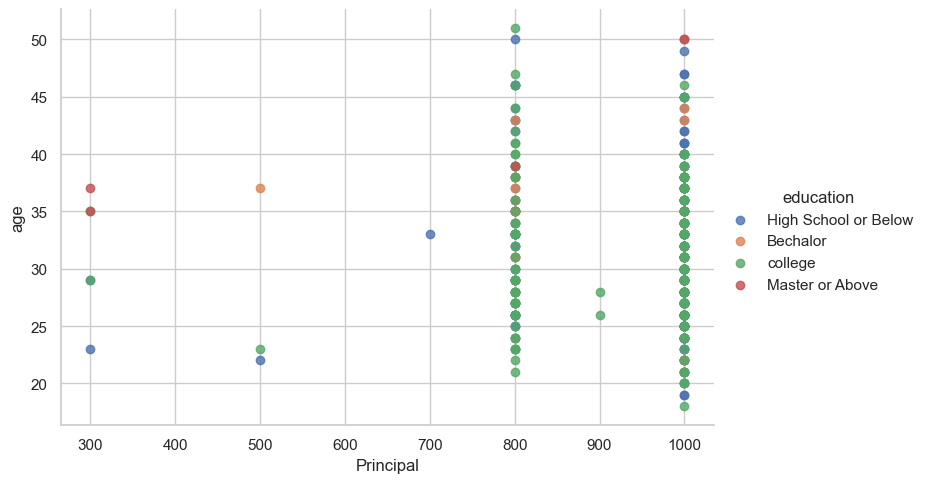

In [21]:
sns.lmplot(x='Principal', y='age', hue = 'education', data=df, aspect=1.5, fit_reg = False)
plt.show()

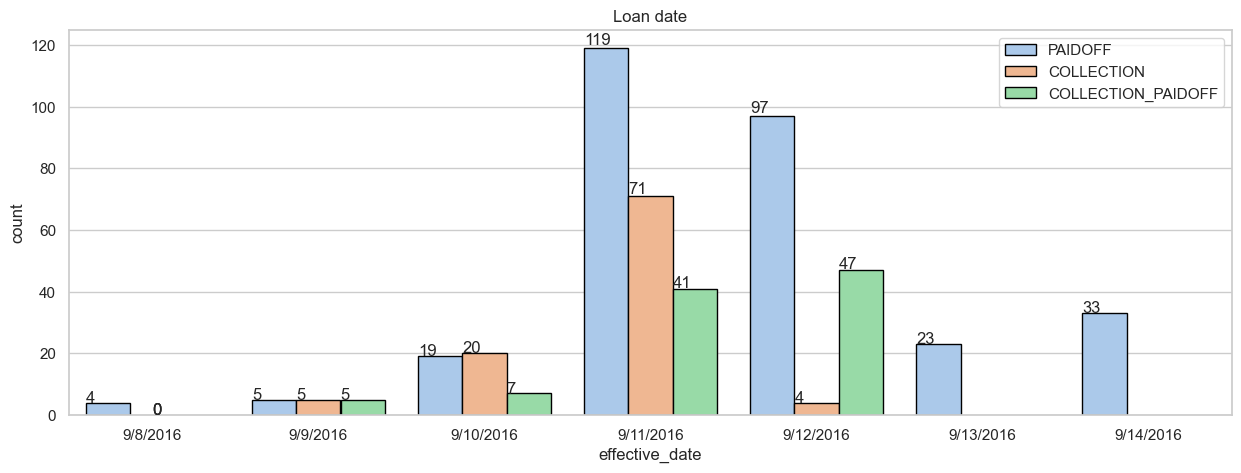

In [22]:
#Lets check whats the loan applications applied on various dates and see the pattern.
fig = plt.figure(figsize=(15,5))
ax = sns.countplot(x="effective_date", hue="loan_status", data=df, palette='pastel', edgecolor='black')
ax.set_title('Loan date')
ax.legend(loc='upper right')
for t in ax.patches:
    if np.isnan(float(t.get_height())):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
plt.show()

